In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties import umath
sns.set_theme(style="darkgrid")
sns.set_context("paper")

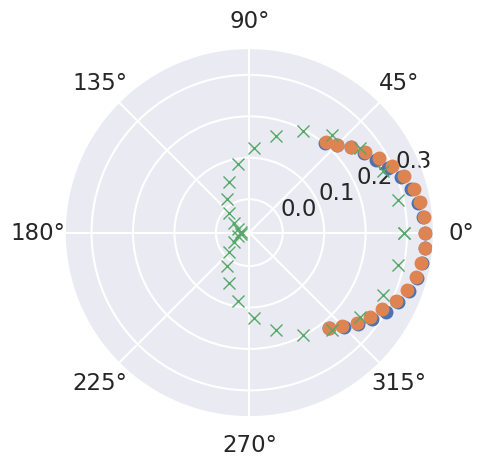

In [12]:
plt.axes(projection='polar')

df=pd.read_csv("LambertschesGesetz.csv")
rads = df["Winkel"]*2*np.pi/360

plt.polar(rads, df["Spannung 1"], "o") 
plt.polar(rads, df["Spannung 2"], "o")
sigma=5.6704E-8 #W/m^4/K^2
T=360+273.15

plt.polar(np.linspace(0, 2*np.pi, 30), 0.115+np.ones(30)*sigma*T**4/4/0.115**2*0.032**2/1000*np.cos(np.linspace(0, 2*np.pi, 30)), "x")
plt.show()

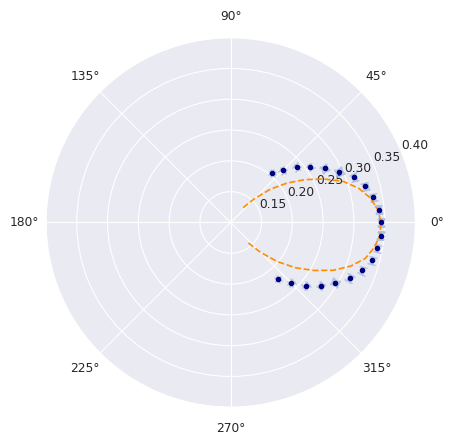

In [31]:
theta = df['Winkel'] * np.pi/180
e_theta = np.sqrt(2) * np.pi/180
r = (df['Spannung 1'] + df['Spannung 2'])/2
e_r = np.maximum(abs(df['Spannung 1'] - r), abs(df['Spannung 2'] - r))

plt.axes(projection='polar')
plt.errorbar(theta, r, xerr= e_theta, yerr=e_r, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
plt.plot(theta, r*np.cos(theta), color = 'darkorange', ls = '--')
plt.ylim((0.1, 0.4))
plt.show()